# Logistic Regression Model
The aim of the logistic regression model here is to predict people's chances of getting diabetes based on four features (age, weight, blood sugar, and gender).  In data preprocessing, I classified genders with label encoding and adjusted the scale of the x data via standardization. The logistic regression model is built using the torch nn module. The Binary Cross Entropy (BCE) is used as a cost function, while the Stochastic Gradient Descent (SGD) is adopted as an optimizer. Finally, the model's accuracy is estimated based on the proportion of correct predictions.

## 1. Import diabetes data 

In [1]:
import pandas as pd

data = pd.read_csv('Diabetes_Data.csv')
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,male,1
1,66,102,128.1,female,1
2,59,65,103.9,male,0
3,46,117,94.8,female,0
4,45,79,57.8,male,0
...,...,...,...,...,...
395,72,63,97.1,female,0
396,22,117,156.7,female,1
397,31,76,119.0,male,0
398,36,65,96.3,female,1


## 2. Data preprocessing

### 2.1 Label ecoding
1. convert genders into digitals

In [2]:
data["Gender"] = data["Gender"].map({"male": 1, "female": 0})
data

,Age,Weight,BloodSugar,Gender,Diabetes
0,25,119,130.8,1,1
1,66,102,128.1,0,1
2,59,65,103.9,1,0
3,46,117,94.8,0,0
4,45,79,57.8,1,0
...,...,...,...,...,...
395,72,63,97.1,0,0
396,22,117,156.7,0,1
397,31,76,119.0,1,0
398,36,65,96.3,0,1


### 2.2 create x and y datasets

In [3]:
# create x and y datasets
x = data[["Age", "Weight", "BloodSugar", "Gender"]]
y = data["Diabetes"]
print(x)
print(y)

     Age  Weight  BloodSugar  Gender
0     25     119       130.8       1
1     66     102       128.1       0
2     59      65       103.9       1
3     46     117        94.8       0
4     45      79        57.8       1
..   ...     ...         ...     ...
395   72      63        97.1       0
396   22     117       156.7       0
397   31      76       119.0       1
398   36      65        96.3       0
399   38      75       106.3       1

[400 rows x 4 columns]
0      1
1      1
2      0
3      0
4      0
      ..
395    0
396    1
397    0
398    1
399    0
Name: Diabetes, Length: 400, dtype: int64


### 2.3 Split data and convert data types
1. create x and y datasets
2. split data into training and test data
3. convert data format into numpy

In [4]:
from sklearn.model_selection import train_test_split
import torch

# Split data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)


# Convert the data format to numpy
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
x_train, x_test, y_train, y_test

(array([[ 47. ,  78. , 112.7,   1. ],
        [ 41. ,  79. ,  90.5,   1. ],
        [ 28. ,  74. ,  96.4,   0. ],
        ...,
        [ 44. ,  53. , 122.2,   1. ],
        [ 42. ,  47. ,  69.7,   1. ],
        [ 69. , 101. ,  97. ,   0. ]]),
 array([[ 74. , 103. , 127.9,   0. ],
        [ 73. ,  74. , 106.1,   0. ],
        [ 77. ,  65. ,  52. ,   1. ],
        [ 22. , 107. , 110. ,   1. ],
        [ 31. , 104. ,  98.2,   1. ],
        [ 77. ,  47. ,  84.7,   1. ],
        [ 50. ,  48. , 103.8,   0. ],
        [ 79. ,  87. , 148.4,   0. ],
        [ 29. , 106. , 102.8,   1. ],
        [ 64. ,  98. , 134. ,   1. ],
        [ 27. ,  74. , 115. ,   1. ],
        [ 29. ,  81. ,  88.1,   0. ],
        [ 45. ,  79. ,  57.8,   1. ],
        [ 47. , 106. ,  93.3,   0. ],
        [ 60. , 116. , 113.5,   1. ],
        [ 63. ,  74. , 102.3,   0. ],
        [ 59. ,  65. , 103.9,   1. ],
        [ 53. , 107. ,  79. ,   1. ],
        [ 52. ,  42. ,  80.5,   0. ],
        [ 66. ,  62. ,  72.7,   1. 

### 2.4 Feature scaling
1. make the data range smaller via standardization 
2. Reference to standardization with StandardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_train, x_test

(array([[-0.13049114, -0.12021965,  0.35271768,  0.93933644],
        [-0.49202504, -0.07737968, -0.61346817,  0.93933644],
        [-1.27534849, -0.2915795 , -0.35668905, -1.06458129],
        ...,
        [-0.31125809, -1.19121871,  0.76617559,  0.93933644],
        [-0.43176939, -1.44825849, -1.51872338,  0.93933644],
        [ 1.19513315,  0.8650995 , -0.33057592, -1.06458129]]),
 array([[ 1.4964114 ,  0.95077942,  1.01425033, -1.06458129],
        [ 1.43615575, -0.2915795 ,  0.06547324, -1.06458129],
        [ 1.67717835, -0.67713916, -2.28906075,  0.93933644],
        [-1.63688239,  1.12213927,  0.23520859,  0.93933644],
        [-1.09458154,  0.99361938, -0.27834966,  0.93933644],
        [ 1.67717835, -1.44825849, -0.86589511,  0.93933644],
        [ 0.05027581, -1.40541853, -0.0346271 , -1.06458129],
        [ 1.79768965,  0.26534002,  1.90644898, -1.06458129],
        [-1.21509284,  1.07929931, -0.07814898,  0.93933644],
        [ 0.89385491,  0.73657961,  1.27973383,  0.9393

## 3. Create a logistic regression model
1. in_features=4: layers of "Age", "Weight", "BloodSugar", "Gender" 
2. dtype=torch.float64: unify data types
3. Sigmoid function: equate all values of x to an output ranging between 0 and 1. When x is small, the value of the sigmoid function is close to 0. When x is large, the value of sigmoid is close to 1.
4. Introduction to Sigmoid function: https://www.sciencedirect.com/topics/computer-science/sigmoid-function#:~:text=Sigmoid%20functions%20are%20simply%20mathematical,creating%20an%20S%2Dshaped%20graph.

In [6]:
from torch import nn

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=4, out_features=1, dtype=torch.float64)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear_layer(x))

### 3.1 Review the logistic regression model above

In [7]:
torch.manual_seed(87)
model = LogisticRegressionModel()
model, model.state_dict()

(LogisticRegressionModel(
   (linear_layer): Linear(in_features=4, out_features=1, bias=True)
   (sigmoid): Sigmoid()
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], dtype=torch.float64)),
              ('linear_layer.bias', tensor([-0.4544], dtype=torch.float64))]))

In [8]:
x_train.dtype, model.linear_layer.weight.dtype

(dtype('float64'), torch.float64)

### 3.2 Convert the data format from numpy to torch 

In [9]:
# Convert the data format from numpy to tensor

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

x_train, x_test, y_train, y_test

(tensor([[-0.1305, -0.1202,  0.3527,  0.9393],
         [-0.4920, -0.0774, -0.6135,  0.9393],
         [-1.2753, -0.2916, -0.3567, -1.0646],
         ...,
         [-0.3113, -1.1912,  0.7662,  0.9393],
         [-0.4318, -1.4483, -1.5187,  0.9393],
         [ 1.1951,  0.8651, -0.3306, -1.0646]], dtype=torch.float64),
 tensor([[ 1.4964,  0.9508,  1.0143, -1.0646],
         [ 1.4362, -0.2916,  0.0655, -1.0646],
         [ 1.6772, -0.6771, -2.2891,  0.9393],
         [-1.6369,  1.1221,  0.2352,  0.9393],
         [-1.0946,  0.9936, -0.2783,  0.9393],
         [ 1.6772, -1.4483, -0.8659,  0.9393],
         [ 0.0503, -1.4054, -0.0346, -1.0646],
         [ 1.7977,  0.2653,  1.9064, -1.0646],
         [-1.2151,  1.0793, -0.0781,  0.9393],
         [ 0.8939,  0.7366,  1.2797,  0.9393],
         [-1.3356, -0.2916,  0.4528,  0.9393],
         [-1.2151,  0.0083, -0.7179, -1.0646],
         [-0.2510, -0.0774, -2.0366,  0.9393],
         [-0.1305,  1.0793, -0.4916, -1.0646],
         [ 0.6528,  1.5

## 4. Create a cost function

### 4.1 Convert the matrix of data before creating a cost function

In [10]:
# Convert the matrix of data
y_train = y_train.reshape(-1, 1) #Automatically adjust the first dimension and and set the 2nd dimension to 1.
y_test = y_test.reshape(-1, 1)
y_train = y_train.type(torch.double) 
y_test = y_test.type(torch.double)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

torch.Size([320, 4]) torch.Size([320, 1]) torch.Size([80, 4]) torch.Size([80, 1])


### 4.2 Create a cost function and an optimizer
1. Use Binary Cross Entropy (BCE) as a cost function:
2. Reference to Binary Cross Entropy (BCE) in PyTorch: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html
3. Use Stochastic Gradient Descent as optimizer
4. Reference to Stochastic Gradient Descent in PyTorch: https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [11]:
# Import an optimizer and calculate costs

from torch import optim 

cost_function = nn.BCELoss() #BCE: Binary Cross Entropy
y_pred = model(x_train)
cost = cost_function(y_pred, y_train) #Review the cost between y_pred and y_train data
print(model.state_dict())
print(cost)
print("------------------------------------------------------------------------------")

optimizer = optim.SGD(params=model.parameters(), lr=0.001)  #Use Stochastic Gradient Descent as optimizer
optimizer.zero_grad()    #Set the gradient to zero
cost.backward()          #Calculate the gradient 
optimizer.step()         #Update gradient values 

y_pred = model(x_train)
cost = cost_function(y_pred, y_train) #Review the cost between y_pred and y_train data
print(model.state_dict())
print(cost)

OrderedDict([('linear_layer.weight', tensor([[-0.4710,  0.1380, -0.1459, -0.1397]], dtype=torch.float64)), ('linear_layer.bias', tensor([-0.4544], dtype=torch.float64))])
tensor(0.7056, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>)
------------------------------------------------------------------------------
OrderedDict([('linear_layer.weight', tensor([[-0.4708,  0.1382, -0.1455, -0.1397]], dtype=torch.float64)), ('linear_layer.bias', tensor([-0.4545], dtype=torch.float64))])
tensor(0.7054, dtype=torch.float64, grad_fn=<BinaryCrossEntropyBackward0>)


### 4.3 Create a for loop to update costs

In [12]:
epochs = range(100000)

test_cost_hist = []  #Calculate the cost of test datasets
train_cost_hist = [] #Calculate the cost of train datasets
test_accuracy_hist = []
train_accuracy_hist = []


for Epoch in epochs:
    
    #Set a training mode
    model.train()        
    y_pred = model(x_train) 
    train_cost = cost_function(y_pred, y_train)
    train_cost_hist.append(train_cost.detach().numpy())  
    
    # Calculate the accuracy of the prediction by summing all numbers that are equal to y_train
    train_accuracy = (torch.round(y_pred)==y_train).sum() / len(y_train) * 100
    test_accuracy_hist.append(train_accuracy)
    
    optimizer.zero_grad()    #Set the gradient to zero
    train_cost.backward()    #Calculate the gradient 
    optimizer.step()         #Update gradient values 
    
    #Set an evaluation mode
    model.eval()             
    with torch.inference_mode():
        test_pred = model(x_test)
        test_cost = cost_function(test_pred, y_test)
        test_cost_hist.append(test_cost.detach().numpy())
        
        # Calculate the accuracy of the prediction by summing all numbers that are equal to y_train
        test_accuracy = (torch.round(test_pred)==y_test).sum() / len(y_test) * 100
        train_accuracy_hist.append(test_accuracy)
    
    if Epoch%1000==0:
        print(f"Epoch: {Epoch:3} | Train cost: {train_cost: .3e} | Test cost: {test_cost: .3e} | Train accuracy: {train_accuracy}% | Test accuracy: {test_accuracy}% ")
        

Epoch:   0 | Train cost:  7.054e-01 | Test cost:  7.409e-01 | Train accuracy: 54.375% | Test accuracy: 51.25% 
Epoch: 1000 | Train cost:  5.726e-01 | Test cost:  6.024e-01 | Train accuracy: 73.4375% | Test accuracy: 70.0% 
Epoch: 2000 | Train cost:  4.958e-01 | Test cost:  5.199e-01 | Train accuracy: 80.9375% | Test accuracy: 78.75% 
Epoch: 3000 | Train cost:  4.475e-01 | Test cost:  4.671e-01 | Train accuracy: 84.6875% | Test accuracy: 83.75% 
Epoch: 4000 | Train cost:  4.147e-01 | Test cost:  4.308e-01 | Train accuracy: 86.5625% | Test accuracy: 83.75% 
Epoch: 5000 | Train cost:  3.909e-01 | Test cost:  4.045e-01 | Train accuracy: 88.75% | Test accuracy: 83.75% 
Epoch: 6000 | Train cost:  3.726e-01 | Test cost:  3.846e-01 | Train accuracy: 88.75% | Test accuracy: 82.5% 
Epoch: 7000 | Train cost:  3.581e-01 | Test cost:  3.690e-01 | Train accuracy: 89.0625% | Test accuracy: 82.5% 
Epoch: 8000 | Train cost:  3.463e-01 | Test cost:  3.564e-01 | Train accuracy: 89.0625% | Test accuracy: 

Epoch: 74000 | Train cost:  2.390e-01 | Test cost:  2.624e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 75000 | Train cost:  2.388e-01 | Test cost:  2.623e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 76000 | Train cost:  2.386e-01 | Test cost:  2.623e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 77000 | Train cost:  2.384e-01 | Test cost:  2.622e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 78000 | Train cost:  2.382e-01 | Test cost:  2.621e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 79000 | Train cost:  2.380e-01 | Test cost:  2.620e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 80000 | Train cost:  2.379e-01 | Test cost:  2.619e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 81000 | Train cost:  2.377e-01 | Test cost:  2.619e-01 | Train accuracy: 89.375% | Test accuracy: 88.75% 
Epoch: 82000 | Train cost:  2.375e-01 | Test cost:  2.618e-01 | Train accuracy: 89.375% | Test a

## 5. Visualize cost change and accuracy 

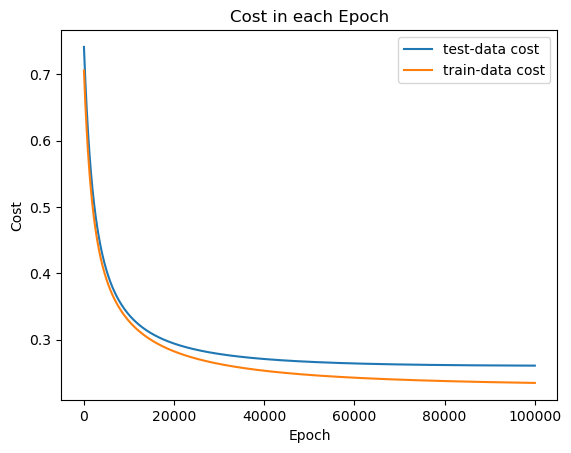

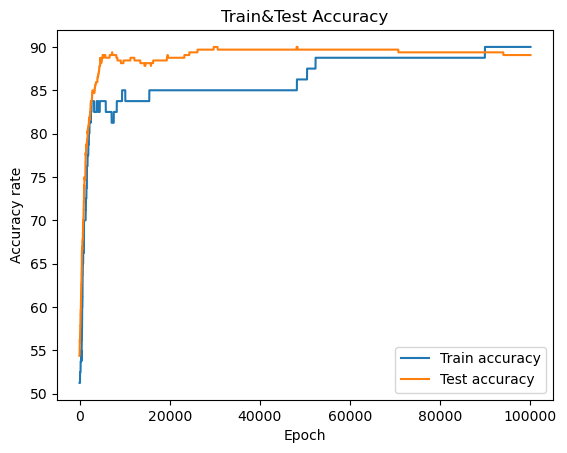

In [13]:
import matplotlib.pyplot as plt

plt.plot(epochs, test_cost_hist, label ="test-data cost")
plt.plot(epochs, train_cost_hist, label ="train-data cost")
plt.title("Cost in each Epoch")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.legend()
plt.show()

plt.plot(epochs, train_accuracy_hist, label ="Train accuracy")
plt.plot(epochs, test_accuracy_hist, label ="Test accuracy")
plt.title("Train&Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy rate")
plt.legend()
plt.show()

## 6. Review model parameters and the final accuracy rate

In [14]:
import numpy as np

# Review optimal weight values and bias values
print(f"The following dictionary gives information about optimal weight and bias values after {Epoch+1} epochs.")
print("")
print(model.state_dict())

# Convert weight/bias data format into string
array_weight = model.linear_layer.weight.detach().numpy()
flattened_array_weight = array_weight.flatten() # Flatten the array
string_elements = [str(round(element,3)) for element in flattened_array_weight] # Convert each element to a string
result_string = ', '.join(string_elements) # Join the string elements with a comma separator

bias = round(float(model.linear_layer.bias.detach().numpy()), 3)

print(" ")
print(f"As we can see, the four optimal weight values are: {result_string}. The optimal bias value is: {bias}.")


The following dictionary gives information about optimal weight and bias values after 100000 epochs.

OrderedDict([('linear_layer.weight', tensor([[-0.1825, -0.1210,  3.6457, -0.0998]], dtype=torch.float64)), ('linear_layer.bias', tensor([-1.8235], dtype=torch.float64))])
 
As we can see, the four optimal weight values are: -0.183, -0.121, 3.646, -0.1. The optimal bias value is: -1.824.


In [15]:
# Check how many predicted values are correct
y_pred = model(x_test)
torch.round(y_pred)==y_test

tensor([[ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True

In [16]:
# Calculate the accuracy of the model
accuracy = (torch.round(y_pred)==y_test).sum() / len(y_test) * 100
print(f"The accuracy of this prediction is: {accuracy}%")

The accuracy of this prediction is: 90.0%


# Conclusion
In this trial, after 100,000 epochs, the optimal weights for the four human features (age, weight, blood sugar, gender) are: -0.183, -0.121, 3.646, -0.1. The optimal bias value is -1.824. With 400 datasets of diabetes, the accuracy of the logistic regression model is estimated to be about 90%.